In [12]:
import pycaret
import pandas as pd
from pycaret.regression import * 

# Loading Dataset 

In [3]:
df = pd.read_csv("C:/Users/Senura96/Desktop/Dataset/Real estate.csv")

In [4]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [11]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Pycaret Regresssion Setup

In [28]:
Reg = setup(df, target="Y house price of unit area", train_size = 0.8, categorical_features = None, categorical_imputation = 'constant', ordinal_features = None, high_cardinality_features = None, high_cardinality_method = 'frequency',   numeric_features = ["X4 number of convenience stores"], numeric_imputation = 'mean', date_features = None, ignore_features = ["No"], normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', handle_unknown_categorical = True, unknown_categorical_method = 'least_frequent', pca = True, pca_method = 'linear', pca_components = 0.99, ignore_low_variance = True, combine_rare_levels = True, rare_level_threshold = 0.10, bin_numeric_features = None, remove_outliers = True, outliers_threshold = 0.05, remove_multicollinearity = True, multicollinearity_threshold = 0.9, remove_perfect_collinearity = False, create_clusters = True, cluster_iter = 20, polynomial_features = True, polynomial_degree = 2, trigonometry_features = True, polynomial_threshold = 0.1, group_features = ["X5 latitude","X6 longitude"], group_names = ["latitude_group"], feature_selection = True, feature_selection_threshold = 0.8, feature_interaction = True, feature_ratio = True, interaction_threshold = 0.01, transform_target = True, transform_target_method = 'box-cox', data_split_shuffle = True, n_jobs = -1, html=True, session_id=None, log_experiment=True, experiment_name=None, log_plots=True, log_profile = True, log_data=True, silent=False, verbose=True, profile=True)

,Description,Value
0,session_id,6965
1,Target,Y house price of unit area
2,Original Data,"(414, 8)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(314, 2)"


In [29]:
top3 = compare_models(n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,5.8878,74.7082,8.1474,0.6021,0.2058,0.1671,0.0540
rf,Random Forest Regressor,5.7174,76.2940,8.2198,0.5984,0.2058,0.1630,0.2160
catboost,CatBoost Regressor,5.8139,76.2352,8.2262,0.5942,0.2079,0.1658,1.1520
gbr,Gradient Boosting Regressor,5.8341,78.4306,8.2856,0.5798,0.2055,0.1673,0.0440
et,Extra Trees Regressor,5.8919,79.9525,8.5168,0.5687,0.2154,0.1688,0.2240
knn,K Neighbors Regressor,6.2122,81.3432,8.6240,0.5601,0.2117,0.1751,0.0520
huber,Huber Regressor,6.2410,84.2864,8.8086,0.5473,0.2226,0.1825,0.0180
en,Elastic Net,6.2469,84.7744,8.8312,0.5450,0.2234,0.1835,0.0130
lasso,Lasso Regression,6.2601,84.9795,8.8333,0.5449,0.2233,0.1838,0.0140
br,Bayesian Ridge,6.2411,84.6458,8.8320,0.5448,0.2237,0.1835,0.0130


# Lightgbm

In [31]:
lightgbm = create_model(estimator = 'lightgbm', ensemble = False, method = None, fold = 10, round = 4, cross_validation = True, verbose = True, system = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.1965,23.6916,4.8674,0.8426,0.1303,0.1153
1,4.7670,42.9610,6.5545,0.6548,0.1766,0.1459
2,4.3371,27.3244,5.2273,0.8134,0.1356,0.1111
3,6.5402,60.0591,7.7498,0.6467,0.2005,0.1871
4,5.0683,36.2765,6.0230,0.8183,0.1803,0.1619
5,7.9405,226.8502,15.0615,0.3996,0.2605,0.1828
6,6.9692,102.3982,10.1192,0.3836,0.2470,0.1746
7,7.2215,87.1338,9.3345,0.3814,0.2133,0.1583
8,5.3163,47.8534,6.9176,0.6182,0.1775,0.1449
9,6.5214,92.5338,9.6195,0.4626,0.3360,0.2897


In [43]:
tune_lightgbm = tune_model(estimator = lightgbm,  fold = 10,  round = 4,  n_iter = 10,  custom_grid = None, optimize = 'r2', choose_better = True, verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.3727,58.8802,7.6733,0.6088,0.1958,0.1536
1,5.4989,48.0116,6.9290,0.6142,0.1754,0.1566
2,5.1648,43.7019,6.6107,0.7016,0.1575,0.1298
3,6.3392,63.0764,7.9421,0.6290,0.2437,0.2072
4,6.7261,71.9506,8.4824,0.6397,0.2406,0.2055
5,8.4593,238.1338,15.4316,0.3698,0.2815,0.2049
6,6.6449,76.5466,8.7491,0.5392,0.1947,0.1654
7,7.8511,95.8583,9.7907,0.3194,0.2157,0.1767
8,4.9257,40.1901,6.3396,0.6793,0.1678,0.1359
9,7.0379,105.0721,10.2505,0.3898,0.3676,0.3389


In [44]:
bag_lightgbm=ensemble_model(estimator = tune_lightgbm, method = 'Bagging',  fold = 10, n_estimators = 10, round = 4,  choose_better = True, optimize = 'R2', verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.5655,27.9404,5.2859,0.8144,0.1392,0.1261
1,4.7083,41.2762,6.4247,0.6683,0.1751,0.1458
2,4.2880,26.2634,5.1248,0.8207,0.1350,0.1106
3,6.3220,54.7904,7.4021,0.6777,0.1966,0.1809
4,4.9625,34.4171,5.8666,0.8276,0.1767,0.1587
5,7.8680,228.8689,15.1284,0.3943,0.2580,0.1772
6,6.6098,94.5998,9.7262,0.4306,0.2280,0.1652
7,6.8867,80.7887,8.9883,0.4264,0.2022,0.1514
8,5.2784,43.5951,6.6027,0.6522,0.1682,0.1411
9,6.5229,92.9333,9.6402,0.4603,0.3375,0.2909


In [45]:
boos_lightgbm=ensemble_model(estimator = tune_lightgbm, method = 'Boosting',  fold = 10, n_estimators = 10, round = 4,  choose_better = True, optimize = 'R2', verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.5812,30.1494,5.4909,0.7997,0.1363,0.1218
1,4.9477,47.9468,6.9244,0.6147,0.1793,0.1461
2,4.0181,22.7842,4.7733,0.8444,0.1263,0.1093
3,7.4972,75.8165,8.7073,0.5541,0.2630,0.2176
4,4.9192,35.5906,5.9658,0.8218,0.1800,0.1573
5,7.9256,219.6690,14.8212,0.4186,0.2621,0.1917
6,7.6252,140.8368,11.8675,0.1522,0.2556,0.1896
7,7.5890,93.8103,9.6856,0.3340,0.2149,0.1637
8,5.0002,42.8529,6.5462,0.6581,0.1679,0.1393
9,7.1859,112.9279,10.6268,0.3441,0.3522,0.3157


# RF

In [34]:
rf = create_model(estimator = 'rf', fold = 10, round = 4, cross_validation = True, verbose = True, system = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.1413,29.1662,5.4006,0.8062,0.1377,0.1132
1,5.0203,42.2592,6.5007,0.6604,0.1723,0.1492
2,4.5477,34.1065,5.8401,0.7671,0.1528,0.1215
3,6.7579,67.9777,8.2449,0.6002,0.2255,0.1905
4,4.4897,29.5452,5.4356,0.8520,0.1577,0.1410
5,7.2336,239.5805,15.4784,0.3659,0.2672,0.1657
6,6.7579,98.8608,9.9429,0.4049,0.2372,0.1662
7,6.5337,72.9292,8.5399,0.4822,0.1952,0.1458
8,5.0566,42.5021,6.5194,0.6609,0.1644,0.1374
9,6.6348,106.0125,10.2962,0.3843,0.3481,0.2991


In [38]:
tune_rf = tune_model(estimator = rf,  fold = 10,  round = 4,  n_iter = 10,  custom_grid = None, optimize = 'r2', choose_better = False, verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.8802,35.1156,5.9258,0.7667,0.1455,0.1328
1,4.6605,38.8007,6.2290,0.6882,0.1693,0.1398
2,4.1519,25.1460,5.0146,0.8283,0.1413,0.1120
3,5.8488,48.9913,6.9994,0.7118,0.1864,0.1687
4,4.7659,36.1209,6.0101,0.8191,0.1814,0.1529
5,7.6273,231.5023,15.2152,0.3873,0.2684,0.1812
6,6.3013,87.0772,9.3315,0.4758,0.2081,0.1548
7,7.5459,95.9723,9.7965,0.3186,0.2258,0.1660
8,4.9623,39.3015,6.2691,0.6864,0.1563,0.1326
9,6.4221,88.5746,9.4114,0.4856,0.3358,0.2901


In [46]:
bag_rf=ensemble_model(estimator = tune_rf, method = 'Bagging',  fold = 10, n_estimators = 10, round = 4,  choose_better = True, optimize = 'R2', verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.1105,39.1405,6.2562,0.7400,0.1525,0.1365
1,4.5664,40.0076,6.3252,0.6785,0.1677,0.1361
2,4.3093,28.0149,5.2929,0.8087,0.1407,0.1142
3,5.5492,46.9968,6.8554,0.7236,0.1857,0.1620
4,4.9790,38.8028,6.2292,0.8057,0.1890,0.1609
5,7.7685,226.8695,15.0622,0.3996,0.2585,0.1776
6,6.3527,86.7720,9.3151,0.4777,0.2036,0.1549
7,7.4398,94.6568,9.7292,0.3280,0.2263,0.1634
8,4.7633,35.3934,5.9492,0.7176,0.1510,0.1315
9,6.3062,93.5355,9.6714,0.4568,0.3436,0.2924


In [47]:
boos_rf=ensemble_model(estimator = tune_rf, method = 'Boosting',  fold = 10, n_estimators = 10, round = 4,  choose_better = True, optimize = 'R2', verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.0280,35.8788,5.9899,0.7616,0.1474,0.1326
1,4.3975,38.1767,6.1787,0.6932,0.1622,0.1305
2,4.2245,25.5158,5.0513,0.8258,0.1355,0.1127
3,6.7488,66.0787,8.1289,0.6113,0.2562,0.1984
4,4.9598,36.0261,6.0022,0.8196,0.1857,0.1614
5,7.9114,231.9820,15.2310,0.3860,0.2663,0.1873
6,8.1785,162.4593,12.7460,0.0221,0.2641,0.2038
7,7.1335,86.2663,9.2880,0.3875,0.2137,0.1583
8,4.8969,43.7686,6.6158,0.6508,0.1628,0.1336
9,6.6856,100.2373,10.0119,0.4178,0.3459,0.3006


# GBR

In [35]:
gbr = create_model(estimator = 'gbr', fold = 10, round = 4, cross_validation = True, verbose = True, system = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.9704,38.5676,6.2103,0.7438,0.1549,0.1326
1,4.2456,34.6336,5.8850,0.7217,0.1582,0.1276
2,4.2131,24.4086,4.9405,0.8334,0.1377,0.1136
3,5.4275,41.3909,6.4336,0.7565,0.1858,0.1609
4,4.9427,35.6879,5.9739,0.8213,0.1726,0.1527
5,7.2810,218.9357,14.7965,0.4206,0.2545,0.1719
6,7.7602,131.7473,11.4781,0.2070,0.2564,0.1959
7,7.4218,91.0999,9.5446,0.3532,0.2147,0.1634
8,4.9187,38.9320,6.2395,0.6894,0.1556,0.1314
9,7.1599,128.9026,11.3535,0.2514,0.3642,0.3228


In [39]:
tune_gbr = tune_model(estimator = gbr,  fold = 10,  round = 4,  n_iter = 10,  custom_grid = None, optimize = 'r2', choose_better = False, verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.2058,31.1382,5.5802,0.7931,0.1435,0.1175
1,4.3933,32.8950,5.7354,0.7357,0.1585,0.1321
2,4.6986,31.8437,5.6430,0.7826,0.1503,0.1237
3,6.8533,70.2853,8.3836,0.5866,0.2566,0.1972
4,4.8392,32.9521,5.7404,0.8350,0.1687,0.1512
5,7.2825,228.0176,15.1003,0.3965,0.2629,0.1695
6,7.3082,117.5030,10.8399,0.2927,0.2444,0.1808
7,6.8858,82.8950,9.1047,0.4115,0.2048,0.1514
8,5.2457,44.2986,6.6557,0.6466,0.1649,0.1413
9,6.1512,83.8111,9.1548,0.5132,0.3307,0.2804


In [49]:
bag_gbr=ensemble_model(estimator = tune_gbr, method = 'Bagging',  fold = 10, n_estimators = 10, round = 4,  choose_better = True, optimize = 'R2', verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.9623,26.2985,5.1282,0.8253,0.1275,0.1072
1,4.2228,33.2604,5.7672,0.7327,0.1576,0.1265
2,4.2135,27.0793,5.2038,0.8151,0.1407,0.1116
3,6.6811,63.7359,7.9835,0.6251,0.2343,0.1923
4,4.5452,27.8176,5.2742,0.8607,0.1561,0.1422
5,7.4039,226.7868,15.0594,0.3998,0.2549,0.1668
6,6.7822,98.3421,9.9168,0.4080,0.2269,0.1666
7,6.8024,78.9229,8.8839,0.4397,0.2019,0.1507
8,4.9280,38.5089,6.2056,0.6928,0.1589,0.1355
9,6.4474,92.6890,9.6275,0.4617,0.3401,0.2933


In [48]:
boos_gbr=ensemble_model(estimator = tune_gbr, method = 'Boosting',  fold = 10, n_estimators = 10, round = 4,  choose_better = True, optimize = 'R2', verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.0280,27.6839,5.2616,0.8161,0.1413,0.1095
1,4.8270,37.9561,6.1609,0.6950,0.1667,0.1397
2,4.5432,30.3738,5.5112,0.7926,0.1439,0.1200
3,6.9671,77.2824,8.7910,0.5454,0.2867,0.2011
4,4.7590,32.0778,5.6637,0.8394,0.1679,0.1511
5,6.8912,219.9395,14.8304,0.4179,0.2567,0.1628
6,7.3531,116.1142,10.7756,0.3011,0.2434,0.1811
7,6.4303,72.9674,8.5421,0.4820,0.1911,0.1408
8,5.4815,49.7191,7.0512,0.6033,0.1722,0.1472
9,6.4605,93.0805,9.6478,0.4594,0.3379,0.2892


# Selecting Models with Highest Optimized R2 score

In [52]:


Blend1=blend_models(estimator_list = [bag_gbr , bag_lightgbm ],  fold = 10,  round = 4,  choose_better = False, optimize = 'R2', verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.2572,25.8827,5.0875,0.8280,0.1308,0.1165
1,4.3512,34.5435,5.8774,0.7224,0.1623,0.1335
2,4.1321,25.0903,5.0090,0.8287,0.1338,0.1077
3,6.4723,57.4115,7.5770,0.6623,0.2090,0.1849
4,4.7247,30.3155,5.5060,0.8482,0.1651,0.1498
5,7.5820,227.0345,15.0677,0.3991,0.2551,0.1696
6,6.5924,94.8205,9.7376,0.4292,0.2249,0.1635
7,6.8228,79.2887,8.9044,0.4371,0.2013,0.1505
8,5.1011,39.9863,6.3235,0.6810,0.1616,0.1382
9,6.3994,91.8671,9.5847,0.4665,0.3381,0.2903


In [53]:


Blend2=blend_models(estimator_list = [bag_gbr , bag_lightgbm,
tune_rf       ],  fold = 10,  round = 4,  choose_better = False, optimize = 'R2', verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.3142,27.4167,5.2361,0.8179,0.1315,0.1169
1,4.3800,35.4239,5.9518,0.7154,0.1638,0.1340
2,4.1057,24.6667,4.9666,0.8316,0.1352,0.1079
3,6.2353,52.6224,7.2541,0.6905,0.1943,0.1781
4,4.6060,30.7455,5.5449,0.8460,0.1676,0.1477
5,7.5574,227.0395,15.0678,0.3991,0.2576,0.1724
6,6.4733,91.0898,9.5441,0.4517,0.2178,0.1601
7,7.0592,84.1975,9.1759,0.4022,0.2085,0.1555
8,5.0075,39.1902,6.2602,0.6873,0.1587,0.1346
9,6.3312,90.3367,9.5046,0.4753,0.3369,0.2884


In [54]:

Blend3=blend_models(estimator_list = [bag_gbr , bag_lightgbm,
tune_rf ,
bag_rf         ],  fold = 10,  round = 4,  choose_better = False, optimize = 'R2', verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.4037,28.7646,5.3633,0.8089,0.1334,0.1193
1,4.4366,36.0668,6.0056,0.7102,0.1649,0.1349
2,4.1133,24.6215,4.9620,0.8319,0.1363,0.1088
3,6.1242,50.9027,7.1346,0.7006,0.1897,0.1753
4,4.5630,31.5294,5.6151,0.8421,0.1700,0.1469
5,7.5617,227.5950,15.0863,0.3977,0.2596,0.1742
6,6.4237,89.6468,9.4682,0.4604,0.2148,0.1587
7,7.1821,86.9017,9.3221,0.3830,0.2125,0.1582
8,4.9611,39.0059,6.2455,0.6888,0.1577,0.1328
9,6.3213,89.7355,9.4729,0.4788,0.3364,0.2880


# Stack

In [58]:
Stack1 = stack_models(estimator_list=[Blend1   ,Blend3], meta_model = Blend2  , fold = 10, round = 4, restack = True, choose_better = False, optimize = 'R2', verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.9878,40.0699,6.3301,0.7338,0.1643,0.1363
1,4.5795,39.3527,6.2732,0.6838,0.1704,0.1389
2,3.8120,24.5214,4.9519,0.8326,0.1398,0.1026
3,5.6657,52.8519,7.2699,0.6891,0.1963,0.1703
4,5.7888,42.8650,6.5471,0.7853,0.1844,0.1750
5,8.3486,229.1299,15.1370,0.3936,0.2726,0.2017
6,6.8082,90.7997,9.5289,0.4534,0.2225,0.1686
7,7.6029,97.4269,9.8705,0.3083,0.2248,0.1693
8,5.8262,52.3608,7.2361,0.5822,0.1840,0.1563
9,6.6656,96.2144,9.8089,0.4412,0.3458,0.3027


In [59]:
Stack2 = stack_models(estimator_list=[Blend1   ,Blend3 , bag_gbr ], meta_model = Blend2  , fold = 10, round = 4, restack = True, choose_better = False, optimize = 'R2', verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.5932,35.5262,5.9604,0.7640,0.1565,0.1272
1,4.7400,42.9672,6.5549,0.6547,0.1754,0.1430
2,3.8270,24.1425,4.9135,0.8352,0.1414,0.1055
3,5.6899,49.3648,7.0260,0.7096,0.1916,0.1688
4,5.9905,47.0816,6.8616,0.7642,0.1894,0.1792
5,8.0831,219.2142,14.8059,0.4198,0.2622,0.1953
6,7.5264,102.1057,10.1047,0.3854,0.2398,0.1865
7,7.6092,97.6693,9.8828,0.3066,0.2226,0.1687
8,5.5688,46.7046,6.8341,0.6274,0.1755,0.1506
9,6.5833,96.1252,9.8043,0.4417,0.3490,0.3053


# Best Model - Blend2

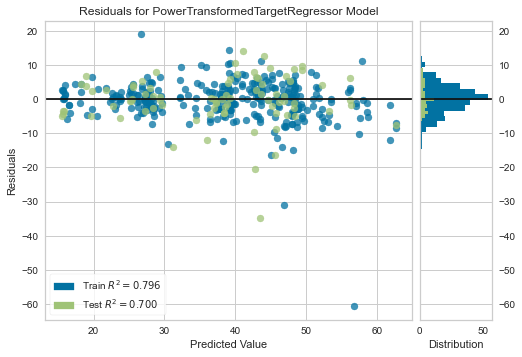

In [68]:
plot_model(Blend2)

In [69]:
evaluate_model(Blend2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Validation with testing data

In [72]:
predict_model(Blend2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,4.9398,51.2663,7.1601,0.6996,0.1765,0.1402


,Component_1,Component_2,Y house price of unit area,Label
0,-12.232598,7.760834,40.299999,47.119500
1,9.876820,76.179411,37.000000,43.200664
2,11.515391,16.073403,31.500000,44.112569
3,118.989673,-31.983705,25.600000,25.206223
4,-78.113074,-16.562487,47.900002,52.236633
...,...,...,...,...
78,107.822023,32.359188,48.000000,35.987877
79,-131.590383,-26.887414,50.000000,56.179721
80,-77.819593,-67.687411,54.400002,45.701067
81,-105.313077,-21.645415,39.700001,49.386232


In [73]:
final_Blend2 = finalize_model(Blend2)

Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations


In [ ]:
!mlflow ui